<a href="https://colab.research.google.com/github/MAKandCHIZZ/Deep-Learning/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [112]:
class Model(nn.Module):
  #input -> hiden layer1 -> hiden layer2 -> output
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [113]:
torch.manual_seed(32)
model = Model()

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [115]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [116]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [117]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [118]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [119]:
# X as the feature and y as the outcome
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [120]:
X = X.values
y = y.values

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [123]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [124]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [125]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [126]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.9570867419242859
Epoch: 20 and loss: 0.7980871796607971
Epoch: 30 and loss: 0.6327950358390808
Epoch: 40 and loss: 0.43861737847328186
Epoch: 50 and loss: 0.290453165769577
Epoch: 60 and loss: 0.17780695855617523
Epoch: 70 and loss: 0.11584118008613586
Epoch: 80 and loss: 0.0893637090921402
Epoch: 90 and loss: 0.07752915471792221


Text(0.5, 0, 'Epoch')

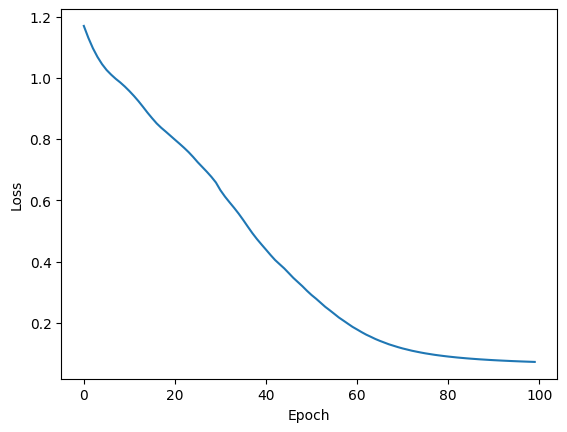

In [127]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [128]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [129]:
loss

tensor(0.0538)

In [130]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x ="Versicolor"
    else:
      x ="Virginica"

    print(f'Prediction: {y_val}, Target: {x} \t {y_val.argmax().item()}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'Accuracy: {correct/len(X_test)}')
print(f'Number correct: {correct}')

Prediction: tensor([-3.3646,  3.9392,  0.3720]), Target: Versicolor 	 1
Prediction: tensor([  7.5572,   1.1015, -11.3347]), Target: Setosa 	 0
Prediction: tensor([  6.5957,   1.5027, -10.4091]), Target: Setosa 	 0
Prediction: tensor([-3.3331,  4.2594,  0.0623]), Target: Versicolor 	 1
Prediction: tensor([-7.3782,  2.8087,  5.1605]), Target: Virginica 	 2
Prediction: tensor([-7.3760,  3.9013,  4.2826]), Target: Virginica 	 2
Prediction: tensor([  6.1971,   1.6470, -10.0047]), Target: Setosa 	 0
Prediction: tensor([  6.6383,   1.4348, -10.4031]), Target: Setosa 	 0
Prediction: tensor([-2.6753,  4.3091, -0.6392]), Target: Versicolor 	 1
Prediction: tensor([  7.1875,   1.3812, -11.0965]), Target: Setosa 	 0
Prediction: tensor([-3.8318,  4.4027,  0.5246]), Target: Versicolor 	 1
Prediction: tensor([-8.6807,  1.9994,  6.8923]), Target: Virginica 	 2
Prediction: tensor([-2.0678,  3.8200, -0.7571]), Target: Versicolor 	 1
Prediction: tensor([-1.0768,  4.3741, -2.2838]), Target: Versicolor 	 1
